#### Fonte dos dados
#### https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


##### Importação de bibliotecas e carregamento de dados

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados
df = pd.read_csv("diabetes.csv")

# Ver os primeiros dados
print(df.head())

# Informações básicas
print(df.info())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

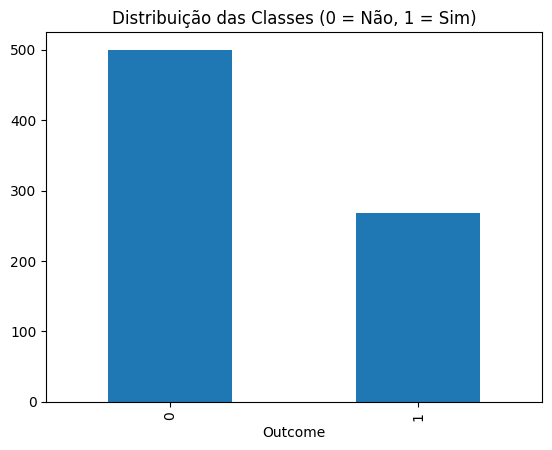

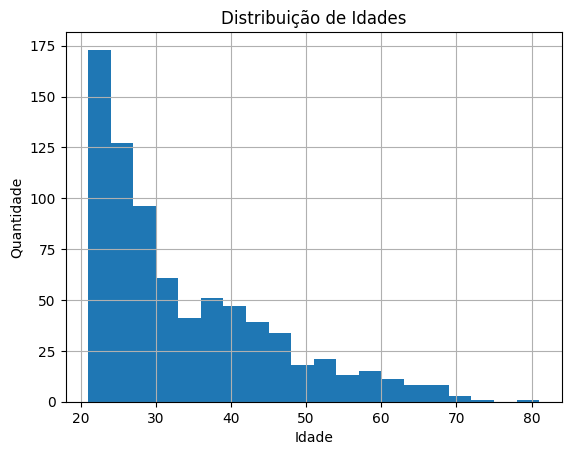

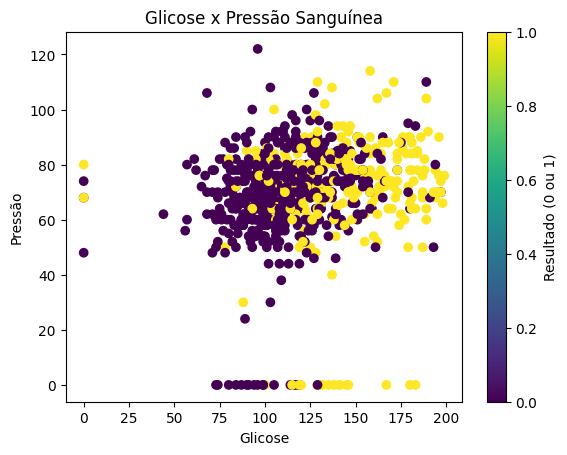

In [6]:
# Distribuição do alvo (Outcome)
df['Outcome'].value_counts().plot(kind='bar', title='Distribuição das Classes (0 = Não, 1 = Sim)')
plt.show()

# Histograma das idades
df['Age'].hist(bins=20)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

# Scatterplot entre glicose e pressão
plt.scatter(df['Glucose'], df['BloodPressure'], c=df['Outcome'], cmap='viridis')
plt.title("Glicose x Pressão Sanguínea")
plt.xlabel("Glicose")
plt.ylabel("Pressão")
plt.colorbar(label="Resultado (0 ou 1)")
plt.show()

##### Verificando e substituindo valores


In [7]:
# Verificar valores nulos
print(df.isnull().sum())

# Substituir zeros por NaN em colunas onde zero não faz sentido
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_clean] = df[cols_to_clean].replace(0, pd.NA)

# Verificar quantos NaNs
print(df.isna().sum())

# Substituir NaNs pela média (poderia ser mediana também)
df.fillna(df.mean(), inplace=True)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


C:\Users\vickg\AppData\Local\Temp\ipykernel_24768\2362394723.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)


##### Treino e teste


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Modelo 1 - Regressão Logística
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Acurácia Regressão Logística:", acc_lr)

# Modelo 2 - Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Acurácia Random Forest:", acc_rf)


Acurácia Regressão Logística: 0.7532467532467533
Acurácia Random Forest: 0.7597402597402597


In [10]:
if acc_rf > acc_lr:
    print("Random Forest teve melhor desempenho.")
else:
    print("Regressão Logística teve melhor desempenho.")


Random Forest teve melhor desempenho.


In [16]:
df.to_csv('dados_preprocessados.csv', index=False)
